# NETWORK ANALYSIS

## PART 1 - The Game of Networks

# Exercise 1.1 [10 marks]

#### 1.1.1 
For each round of the game, compute the following network statistics:
- Number of nodes
- Number of links
- Density
- Clustering coefficient
- Average degrees (in-degree, out-degree, total degree)
- Average path length
- Diameter
- Size of the giant component
- Degree distributions (in-degree, out-degree, total degree)
- Centrality distribution (choose one centrality measure, motivating your choice)

#### 1.1.2
Display these results using a pandas dataframe in which rows are the rounds and columns are the quantities.

#### 1.1.3
In light of these results, provide a brief description of the network (one paragraph maximum).

#### 1.1.4 
What type of network (e.g., random, small world, etc.) do you think this is? Motivate your answer by using your results.

In [1]:
import networkx as nx
import pandas as pd
from pandas import DataFrame
import numpy as np

exposuredf1=pd.read_csv('round1_edgelist.csv')
G1 = nx.from_pandas_edgelist(exposuredf1, create_using=nx.DiGraph())
exposuredf2=pd.read_csv('round2_edgelist.csv')
G2 = nx.from_pandas_edgelist(exposuredf2, create_using=nx.DiGraph())
exposuredf3=pd.read_csv('round3_edgelist.csv')
G3 = nx.from_pandas_edgelist(exposuredf3, create_using=nx.DiGraph())


Number_of_nodes=[]
Number_of_nodes.append(G1.number_of_nodes())
Number_of_nodes.append(G2.number_of_nodes())
Number_of_nodes.append(G3.number_of_nodes())

Number_of_links=[]
Number_of_links.append(G1.number_of_edges())
Number_of_links.append(G2.number_of_edges())
Number_of_links.append(G3.number_of_edges())

Density = []
Density.append(nx.density(G1))
Density.append(nx.density(G2))
Density.append(nx.density(G3))

Clustering_coefficient = []
Clustering_coefficient.append(nx.average_clustering(G1))
Clustering_coefficient.append(nx.average_clustering(G2))
Clustering_coefficient.append(nx.average_clustering(G3))

def average_total_degree(G):
    Total_degree = 0
    for node in G.nodes():
        Total_degree = Total_degree + G.degree(node)
    average_total_degree = ((Total_degree) / (G.number_of_nodes()))
    return average_total_degree
Average_total_degree = []
Average_total_degree.append(average_total_degree(G1))
Average_total_degree.append(average_total_degree(G2))
Average_total_degree.append(average_total_degree(G3))

def average_squared_degree(G):
    k2 = 0
    for node in G.node():
        k2 = k2 + G.degree(node)**2
    average_squared_degree = k2/G.number_of_nodes()
    return average_squared_degree

def average_in_degree(G):
    in_degree = 0
    for node in G.nodes():
        in_degree = in_degree + G.in_degree(node)
    average_in_degree = ((in_degree) / (G.number_of_nodes()))
    return average_in_degree
Average_in_degree = []
Average_in_degree.append(average_in_degree(G1))
Average_in_degree.append(average_in_degree(G2))
Average_in_degree.append(average_in_degree(G3))

def average_out_degree(G):
    out_degree = 0
    for node in G.nodes():
        out_degree = out_degree + G.out_degree(node)
    average_out_degree = ((out_degree) / (G.number_of_nodes()))
    return average_out_degree
Average_out_degree = []
Average_out_degree.append(average_out_degree(G1))
Average_out_degree.append(average_out_degree(G2))
Average_out_degree.append(average_out_degree(G3))

Average_path_length = []
Average_path_length.append(nx.average_shortest_path_length(G1))
Average_path_length.append(nx.average_shortest_path_length(G2))
Average_path_length.append(nx.average_shortest_path_length(G3))

#This network is weakly conneted.We use the maximum distance of a list containing 
#the shortest paths between any two nodes in the network to get the value of diameter.
Diameter = []
Diameter.append(max([max(j.values()) for (i,j) in nx.shortest_path_length(G1)]))
Diameter.append(max([max(j.values()) for (i,j) in nx.shortest_path_length(G2)]))
Diameter.append(max([max(j.values()) for (i,j) in nx.shortest_path_length(G3)]))

size_of_giant_component =[]
G11=G1.to_undirected()
Gcc = sorted(nx.connected_components(G11), key=len)
G111 = G11.subgraph(Gcc[0])
size_of_giant_component.append(G111.number_of_nodes())
G22=G2.to_undirected()
Gdd = sorted(nx.connected_components(G22), key=len)
G222 = G22.subgraph(Gdd[0])
size_of_giant_component.append(G222.number_of_nodes())
G33=G3.to_undirected()
Gee = sorted(nx.connected_components(G33), key=len)
G333 = G33.subgraph(Gee[0])
size_of_giant_component.append(G33.number_of_nodes())

def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq=[0 for d in range(dmax)]
    for d in degseq:
        freq[d] += 1
    return freq

degree_distribution = []
degree1 = nx.degree_histogram(G1)
degree_distribution.append(np.mean(degree1))
degree2 = nx.degree_histogram(G2)
degree_distribution.append(np.mean(degree2))
degree3 = nx.degree_histogram(G3)
degree_distribution.append(np.mean(degree3))

Centrality_distribution = []
Centrality_distribution.append(sum(nx.eigenvector_centrality(G1).values())/len(nx.eigenvector_centrality(G1).values()))
Centrality_distribution.append(sum(nx.eigenvector_centrality(G2).values())/len(nx.eigenvector_centrality(G2).values()))
Centrality_distribution.append(sum(nx.eigenvector_centrality(G3).values())/len(nx.eigenvector_centrality(G3).values()))

kappa = []
kappa.append(average_squared_degree(G1)/average_total_degree(G1)**2)
kappa.append(average_squared_degree(G2)/average_total_degree(G2)**2)
kappa.append(average_squared_degree(G3)/average_total_degree(G3)**2)

data={"Number of nodes":Number_of_nodes,"Number of links":Number_of_links,"Density":Density,
      "Clustering coefficient":Clustering_coefficient,"Average degree(Total)":Average_total_degree,
     "Average in-degree":Average_in_degree,"Average out-degree":Average_out_degree,"Average path length":Average_path_length,
     "Diameter":Diameter,"Size of giant component":size_of_giant_component,"Degree distribution":degree_distribution,
     "Centrality distribution":Centrality_distribution,"Kappa":kappa}
df1=pd.DataFrame(data,index=["round1","round2","round3"])
df1

,Number of nodes,Number of links,Density,Clustering coefficient,Average degree(Total),Average in-degree,Average out-degree,Average path length,Diameter,Size of giant component,Degree distribution,Centrality distribution,Kappa
round1,49,86,0.036565,0.082662,3.510204,1.755102,1.755102,0.765306,11,49,3.500000,0.053522,1.381355
round2,51,125,0.049020,0.163844,4.901961,2.450980,2.450980,1.623137,8,51,2.428571,0.081567,1.527552
round3,51,119,0.046667,0.079884,4.666667,2.333333,2.333333,2.917647,10,51,3.187500,0.089502,1.386555


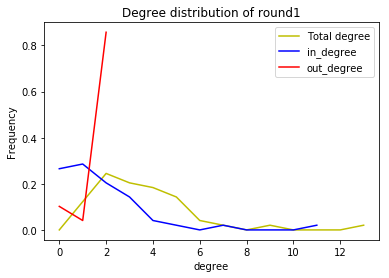

In [3]:
#Degree distribution for round1
import matplotlib.pyplot as plt
degree1 = nx.degree_histogram(G1)
in_degree_freq1 = degree_histogram_directed(G1, in_degree=True)
out_degree_freq1 = degree_histogram_directed(G1, out_degree=True)
x1=range(len(degree1))
y1=[z/float(sum(degree1))for z in degree1]
x2=range(len(in_degree_freq1))
y2=[z/float(sum(in_degree_freq1))for z in in_degree_freq1]
x3=range(len(out_degree_freq1))
y3=[z/float(sum(out_degree_freq1))for z in out_degree_freq1]
plt.plot(x1,y1,"y",label='Total degree')
plt.plot(x2,y2,"b",label='in_degree')
plt.plot(x3,y3,"r",label='out_degree')
plt.xlabel("degree")
plt.ylabel("Frequency")
plt.title('Degree distribution of round1')
plt.legend()

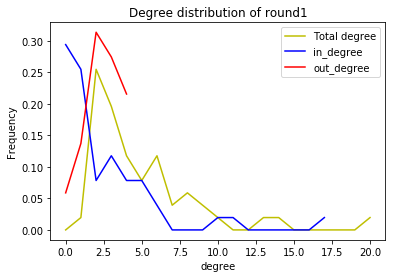

In [5]:
#Degree distribution for round2
import matplotlib.pyplot as plt
degree1 = nx.degree_histogram(G2)
in_degree_freq1 = degree_histogram_directed(G2, in_degree=True)
out_degree_freq1 = degree_histogram_directed(G2, out_degree=True)
x1=range(len(degree1))
y1=[z/float(sum(degree1))for z in degree1]
x2=range(len(in_degree_freq1))
y2=[z/float(sum(in_degree_freq1))for z in in_degree_freq1]
x3=range(len(out_degree_freq1))
y3=[z/float(sum(out_degree_freq1))for z in out_degree_freq1]
plt.plot(x1,y1,"y",label='Total degree')
plt.plot(x2,y2,"b",label='in_degree')
plt.plot(x3,y3,"r",label='out_degree')
plt.xlabel("degree")
plt.ylabel("Frequency")
plt.title('Degree distribution of round1')
plt.legend()

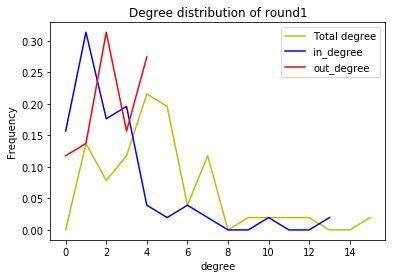

In [6]:
#Degree distribution for round2
import matplotlib.pyplot as plt
degree1 = nx.degree_histogram(G3)
in_degree_freq1 = degree_histogram_directed(G3, in_degree=True)
out_degree_freq1 = degree_histogram_directed(G3, out_degree=True)
x1=range(len(degree1))
y1=[z/float(sum(degree1))for z in degree1]
x2=range(len(in_degree_freq1))
y2=[z/float(sum(in_degree_freq1))for z in in_degree_freq1]
x3=range(len(out_degree_freq1))
y3=[z/float(sum(out_degree_freq1))for z in out_degree_freq1]
plt.plot(x1,y1,"y",label='Total degree')
plt.plot(x2,y2,"b",label='in_degree')
plt.plot(x3,y3,"r",label='out_degree')
plt.xlabel("degree")
plt.ylabel("Frequency")
plt.title('Degree distribution of round1')
plt.legend()

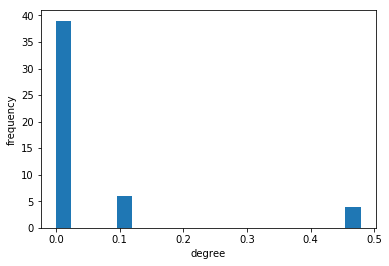

In [7]:
eigenvec_centr = list(nx.eigenvector_centrality(G1).values())
counts, bins, patches = plt.hist(eigenvec_centr, bins = 20)
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()

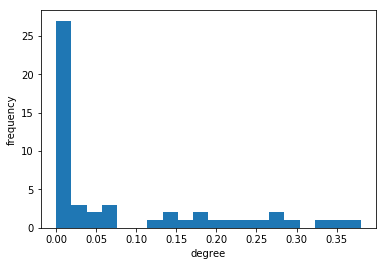

In [8]:
eigenvec_centr = list(nx.eigenvector_centrality(G2).values())
counts, bins, patches = plt.hist(eigenvec_centr, bins = 20)
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()

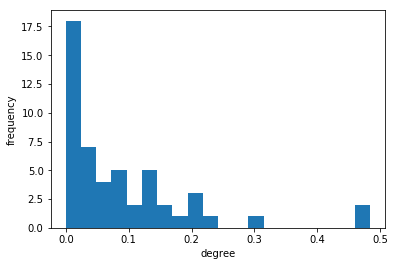

In [9]:
eigenvec_centr = list(nx.eigenvector_centrality(G3).values())
counts, bins, patches = plt.hist(eigenvec_centr, bins = 20)
plt.xlabel('degree')
plt.ylabel('frequency')
plt.show()

### Exercise 1.2 [10 marks]
Plot the temporal evolution of the quantities you computed for Exercise 1.1 and discuss their evolution. Specifically, discuss whether the way these quantities evolved is something you expected, and why.

Note: make sure every plot is clear and it is easy to undertsand which quantity is being plotted! When discussing the results, be accurate in specifying which quantity/plot you are referring to.

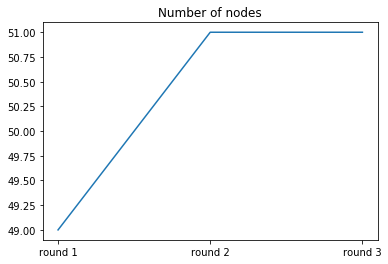

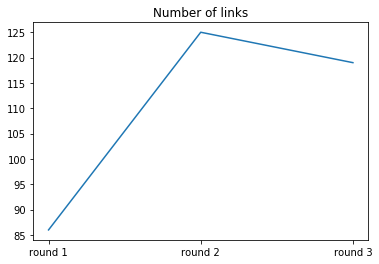

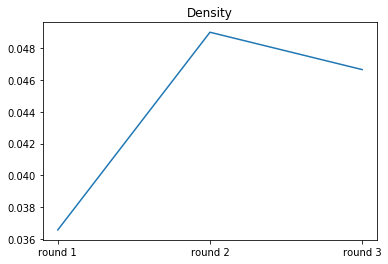

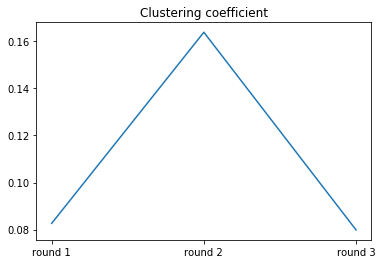

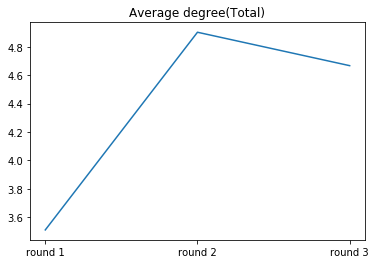

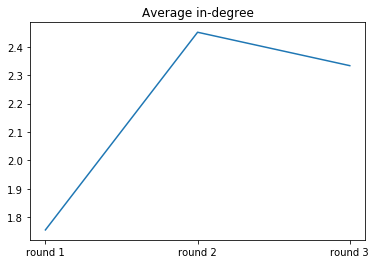

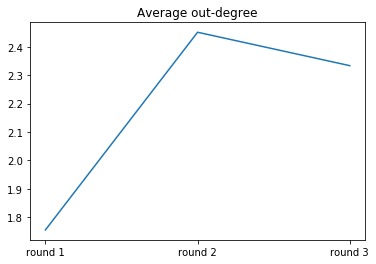

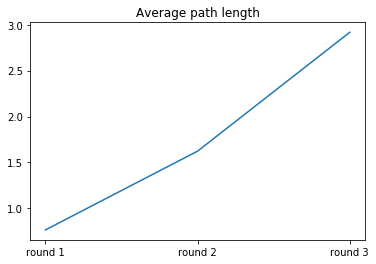

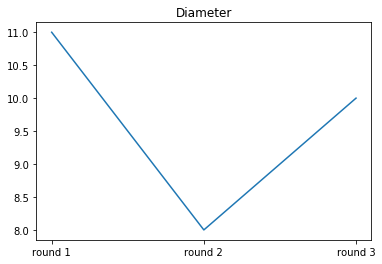

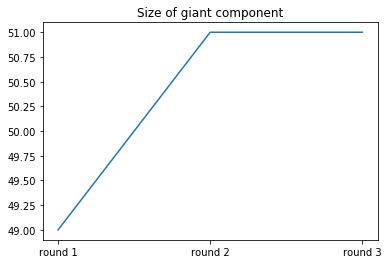

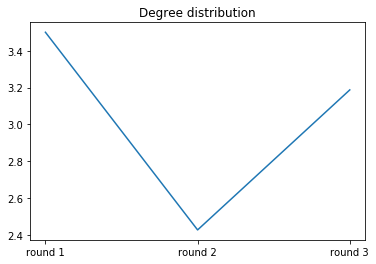

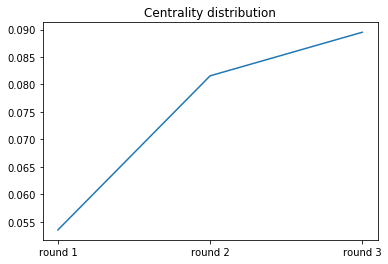

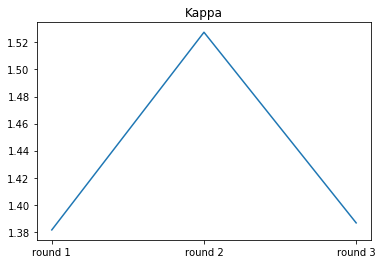

In [12]:
columns = list(df1.columns)
for i in columns:
    x=['round 1','round 2', 'round 3']
    plt.plot(x, list(df1[i]))
    plt.title(i)
    plt.show()

### Exercise 1.3 [10 marks] 

#### 1.3.1
Compute 2-node and 3-node motifs for each round (I suggest you use the library <a href="https://github.com/stoufferlab/pymfinder/">pymfinder</a>, if you decide to use a different one makes sure it works properly). Compute their significance profile. Report your results in a dataframe.

#### 1.3.2
Only for motifs you think are significant, discuss their meaning and on why you think you observe them in the network.

#### 1.3.3
Plot the temporal evolution of motifs that you think are significant.

In [6]:
!pip install pymfinder

In [1]:
import pymfinder as py

network1='round1_edgelist.txt'
result12 = py.pymfinder(network1,
                         links = False,
                         motifsize=2,
                         stoufferIDs = None,
                         allmotifs = False,
                         nrandomizations = 1000,
                         randomize = False,
                         usemetropolis = False,
                         networktype = 'unipartite')
print(result12)

motif real rand srand zscore weight-mean weight-sd
2 68 82.356 2.435 -5.897 0.000 0.000
6 9 1.822 1.217 5.897 0.000 0.000

node 2 6
s1814557 4 0
s1760487 6 0
s1810787 5 0
s2254857 4 0
s2257317 4 0
s2229058 5 0
s2254083 3 0
s2186708 7 0
s2207545 5 0
s2259528 1 0
s2184535 5 2
s2181306 9 2
s2160591 2 0
s2176251 4 1
s2023179 4 0
s2122036 0 2
s2196839 3 1
s2177703 2 0
s2185398 2 0
s2228706 1 0
s2045912 3 0
s2257567 1 2
s2151508 1 1
s2259358 2 1
s2168730 2 0
s1984025 1 1
s2254361 2 0
s2198058 2 0
s2237960 5 0
s2259246 4 0
s2251969 3 0
s2256687 1 0
s2163972 1 2
s2187031 0 2
s2140075 2 0
s2259096 3 0
s2234598 2 0
s2251114 2 0
s2153504 3 0
s2237514 2 0
s2260713 3 0
s2168270 1 0
s2154913 3 0
s2175454 1 1
s2178448 1 0
s2251666 2 0
s2041603 1 0
s1753186 4 0
s2198227 2 0

node (2, 0, 1) (2, 1, 0) (6, 1, 1)
s1814557 2 2 0
s1760487 2 4 0
s1810787 2 3 0
s2254857 2 2 0
s2257317 2 2 0
s2229058 2 3 0
s2254083 2 1 0
s2186708 2 5 0
s2207545 2 3 0
s2259528 0 1 0
s2184535 0 5 2
s2181306 0 9 2
s2160591 2 0 0


In [2]:
result13 = py.pymfinder(network1,
                         links = False,
                         motifsize=3,
                         stoufferIDs = None,
                         allmotifs = False,
                         nrandomizations = 1000,
                         randomize = False,
                         usemetropolis = False,
                         networktype = 'unipartite')
print(result13)

motif real rand srand zscore weight-mean weight-sd
6 21 26.408 1.757 -3.078 0.000 0.000
12 68 80.427 2.775 -4.478 0.000 0.000
14 4 5.494 0.700 -2.133 0.000 0.000
36 75 81.844 1.671 -4.096 0.000 0.000
38 9 3.129 1.662 3.533 0.000 0.000
46 1 0.027 0.162 6.000 0.000 0.000
74 38 36.622 1.526 0.903 0.000 0.000
78 6 5.685 0.770 0.409 0.000 0.000
98 3 0.713 0.792 2.888 0.000 0.000
102 0 0.305 0.520 -0.587 0.000 0.000
108 0 0.463 0.688 -0.673 0.000 0.000
110 0 0.147 0.392 -0.375 0.000 0.000
238 0 0.056 0.230 -0.243 0.000 0.000

node 6 12 14 36 38 46 74 78 98
s1814557 2 5 0 5 1 0 0 0 1
s1760487 2 14 0 5 3 0 0 0 1
s1810787 3 9 0 4 1 0 0 0 1
s2254857 0 8 0 0 3 0 0 0 1
s2257317 0 8 0 1 3 0 0 0 1
s2229058 3 11 0 6 1 0 0 0 0
s2254083 2 5 0 3 0 0 1 0 1
s2186708 5 15 0 11 1 0 0 0 0
s2207545 2 14 1 14 1 0 4 0 0
s2259528 1 5 0 0 0 0 0 0 0
s2184535 5 4 0 10 0 0 11 3 0
s2181306 6 7 1 35 0 1 19 3 0
s2160591 1 3 0 3 0 0 1 0 0
s2176251 2 6 1 4 1 0 3 1 0
s2023179 3 5 0 3 0 0 1 0 0
s2122036 0 0 2 0 0 0 3 1 0
s

In [3]:
network2='round2_edgelist.txt'
result22 = py.pymfinder(network2,
                         links = False,
                         motifsize=2,
                         stoufferIDs = None,
                         allmotifs = False,
                         nrandomizations = 1000,
                         randomize = False,
                         usemetropolis = False,
                         networktype = 'unipartite')
print(result22)

motif real rand srand zscore weight-mean weight-sd
2 97 117.666 3.194 -6.470 0.000 0.000
6 14 3.667 1.597 6.470 0.000 0.000

node 2 6
s1814557 5 0
s1760487 7 0
s1810787 12 1
s2259246 6 0
s2237514 2 0
s2257317 8 0
s1753186 4 1
s2229058 6 1
s2181306 16 2
s2254857 4 1
s2237960 3 2
s2186708 9 2
s2207545 6 2
s2198058 2 0
s2254083 4 1
s2176251 7 1
s2160591 0 1
s2259358 2 3
s2184535 5 2
s2154913 6 0
s2259528 2 0
s2163972 3 1
s2187031 5 0
s2122036 0 2
s2023179 2 0
s2174688 2 0
s2175454 1 1
s2196839 4 1
s1984025 2 1
s2177703 2 0
s2185398 3 0
s2228706 3 0
s2178448 2 0
s2045912 3 0
s2257567 2 1
s2151508 4 0
s2251969 3 0
s2259096 3 1
s2168730 2 0
s2041603 2 0
s2254361 2 0
s2256687 1 0
s2140075 4 0
s2234598 3 0
s2251114 4 0
s2153504 3 0
s2260713 3 0
s2168270 3 0
s2251666 3 0
s2182294 2 0
s2169141 2 0

node (2, 0, 1) (2, 1, 0) (6, 1, 1)
s1814557 4 1 0
s1760487 3 4 0
s1810787 2 10 1
s2259246 2 4 0
s2237514 1 1 0
s2257317 4 4 0
s1753186 0 4 1
s2229058 2 4 1
s2181306 1 15 2
s2254857 2 2 1
s2237960 2 1 

In [4]:
result23 = py.pymfinder(network2,
                         links = False,
                         motifsize=3,
                         stoufferIDs = None,
                         allmotifs = False,
                         nrandomizations = 1000,
                         randomize = False,
                         usemetropolis = False,
                         networktype = 'unipartite')
print(result23)

motif real rand srand zscore weight-mean weight-sd
6 47 60.301 3.554 -3.743 0.000 0.000
12 112 132.405 4.836 -4.220 0.000 0.000
14 25 31.697 2.642 -2.535 0.000 0.000
36 220 229.610 3.650 -2.633 0.000 0.000
38 22 13.916 3.399 2.378 0.000 0.000
46 3 1.474 1.123 1.359 0.000 0.000
74 75 89.079 3.730 -3.775 0.000 0.000
78 6 7.896 1.014 -1.870 0.000 0.000
98 5 1.433 1.152 3.097 0.000 0.000
102 4 2.380 1.432 1.132 0.000 0.000
108 8 2.783 1.711 3.048 0.000 0.000
110 3 0.975 0.878 2.306 0.000 0.000
238 0 0.043 0.203 -0.212 0.000 0.000

node 6 12 14 36 38 46 74 78 98 102 108 110
s1814557 5 10 0 13 2 0 1 0 0 0 0 0
s1760487 5 7 0 9 5 1 0 0 3 1 0 0
s1810787 9 31 5 47 4 0 15 0 0 0 5 1
s2259246 5 13 1 5 5 0 2 0 1 1 0 0
s2237514 2 3 0 8 1 0 1 0 0 0 0 0
s2257317 6 28 1 8 5 0 0 0 2 0 2 0
s1753186 3 7 1 3 3 0 1 0 0 1 1 1
s2229058 3 18 4 11 2 0 9 1 0 1 0 0
s2181306 12 20 10 99 6 2 28 0 1 1 6 1
s2254857 1 5 0 3 3 1 0 0 2 1 1 1
s2237960 0 4 1 3 2 1 1 0 1 2 2 1
s2186708 7 12 3 28 3 0 17 2 0 1 0 1
s2207545 3 

In [5]:
network3='round3_edgelist.txt'
result32 = py.pymfinder(network3,
                         links = False,
                         motifsize=2,
                         stoufferIDs = None,
                         allmotifs = False,
                         nrandomizations = 1000,
                         randomize = False,
                         usemetropolis = False,
                         networktype = 'unipartite')
print(result32)

motif real rand srand zscore weight-mean weight-sd
2 99 112.426 3.313 -4.053 0.000 0.000
6 10 3.287 1.656 4.053 0.000 0.000

node 2 6
s1814557 7 0
s1760487 6 0
s1810787 5 1
s2154913 5 0
s1753186 3 0
s2254857 4 0
s2257317 4 0
s2229058 4 1
s2254083 5 0
s2176251 9 1
s2186708 12 0
s2207545 7 0
s2259528 1 0
s2184535 6 2
s2181306 15 0
s2160591 2 0
s2023179 5 0
s2122036 0 2
s2196839 7 1
s2177703 2 0
s2185398 1 0
s2045912 3 0
s2257567 3 1
s2151508 2 1
s2251969 4 0
s2168730 3 1
s2198227 2 1
s2251666 5 0
s2168270 2 1
s2254361 1 0
s2228706 3 0
s2041603 2 0
s2198058 2 0
s2237960 7 0
s2259246 5 0
s2237514 3 1
s2256687 1 0
s2163972 3 2
s2187031 3 1
s2259358 3 2
s2153504 5 0
s2182294 3 0
s1984025 4 0
s2140075 1 0
s2259096 3 0
s2234598 4 0
s2251114 4 0
s2260713 4 0
s2169141 1 0
s2175454 1 1
s2178448 1 0

node (2, 0, 1) (2, 1, 0) (6, 1, 1)
s1814557 4 3 0
s1760487 2 4 0
s1810787 3 2 1
s2154913 3 2 0
s1753186 0 3 0
s2254857 2 2 0
s2257317 2 2 0
s2229058 2 2 1
s2254083 2 3 0
s2176251 3 6 1
s2186708 2 10 0

In [6]:
result33 = py.pymfinder(network3,
                         links = False,
                         motifsize=3,
                         stoufferIDs = None,
                         allmotifs = False,
                         nrandomizations = 1000,
                         randomize = False,
                         usemetropolis = False,
                         networktype = 'unipartite')
print(result33)

motif real rand srand zscore weight-mean weight-sd
6 62 69.319 3.172 -2.307 0.000 0.000
12 165 171.903 5.449 -1.267 0.000 0.000
14 22 31.624 2.445 -3.937 0.000 0.000
36 170 183.273 3.270 -4.059 0.000 0.000
38 22 14.266 3.118 2.480 0.000 0.000
46 7 1.461 1.099 5.040 0.000 0.000
74 32 29.716 1.658 1.377 0.000 0.000
78 4 3.725 0.569 0.483 0.000 0.000
98 3 2.873 1.523 0.083 0.000 0.000
102 0 1.212 1.045 -1.160 0.000 0.000
108 0 0.415 0.657 -0.632 0.000 0.000
110 0 0.242 0.479 -0.505 0.000 0.000
238 0 0.011 0.104 -0.105 0.000 0.000

node 6 12 14 36 38 46 74 78 98
s1814557 10 22 0 8 2 0 1 0 1
s1760487 9 13 0 4 4 0 0 0 1
s1810787 4 11 1 13 2 2 5 0 1
s2154913 7 12 0 7 1 0 0 0 0
s1753186 4 6 0 2 1 0 0 0 0
s2254857 2 8 0 1 3 0 0 0 0
s2257317 1 9 0 3 2 0 0 0 1
s2229058 2 9 1 11 2 2 5 0 0
s2254083 4 16 3 9 1 0 1 0 1
s2176251 8 26 3 25 6 1 7 1 0
s2186708 7 42 4 42 6 1 0 0 1
s2207545 7 26 1 21 4 0 2 0 1
s2259528 1 10 0 0 0 0 0 0 0
s2184535 5 14 5 14 4 2 9 2 0
s2181306 12 37 1 74 9 4 0 0 1
s2160591 1

In [7]:
import pandas as pd
motif={"2-node motifs(ID:2)":["68","97","99"],"2-node motifs(ID:6)":["9","14","10"],"3-node motifs(ID:6)":["21","47","62"],
       "3-node motifs(ID:12)":["68","112","165"],"3-node motifs(ID:14)":["4","25","22"],"3-node motifs(ID:36)":["75","220","170"],
       "3-node motifs(ID:38)":["9","22","22"],"3-node motifs(ID:46)":["1","3","7"],"3-node motifs(ID:74)":["38","75","32"],
       "3-node motifs(ID:78)":["6","6","4"],"3-node motifs(ID:98)":["3","5","3"],"3-node motifs(ID:102)":["0","4","0"],
      "3-node motifs(ID:108)":["0","8","0"],"3-node motifs(ID:110)":["0","3","0"]}
df_motif=pd.DataFrame(motif,index=["round1","round2","round3"])
df_motif

,2-node motifs(ID:2),2-node motifs(ID:6),3-node motifs(ID:6),3-node motifs(ID:12),3-node motifs(ID:14),3-node motifs(ID:36),3-node motifs(ID:38),3-node motifs(ID:46),3-node motifs(ID:74),3-node motifs(ID:78),3-node motifs(ID:98),3-node motifs(ID:102),3-node motifs(ID:108),3-node motifs(ID:110)
round1,68,9,21,68,4,75,9,1,38,6,3,0,0,0
round2,97,14,47,112,25,220,22,3,75,6,5,4,8,3
round3,99,10,62,165,22,170,22,7,32,4,3,0,0,0


In [8]:
import pandas as pd
zscore={"2-node motifs(ID:2)":["-5.897","-6.470","-4.053"],"2-node motifs(ID:6)":["5.897","6.470","4.053"],
        "3-node motifs(ID:6)":["-3.078","-3.743","-2.307"],
       "3-node motifs(ID:12)":["-4.478","-4.220","-1.267"],"3-node motifs(ID:14)":["-2.133","-2.535","-3.937"],
        "3-node motifs(ID:36)":["-4.096","-2.633","-4.059"],
       "3-node motifs(ID:38)":["3.533","2.378","2.480"],"3-node motifs(ID:46)":["6.000","1.359","5.040"],
        "3-node motifs(ID:74)":["0.903","-3.755","1.377"],
       "3-node motifs(ID:78)":["0.409","-1.870","0.483"],"3-node motifs(ID:98)":["2.888","3.097","0.083"],
        "3-node motifs(ID:102)":["-0.587","1.132","-1.160"],
      "3-node motifs(ID:108)":["-0.673","3.048","-0.632"],"3-node motifs(ID:110)":["-0.375","2.306","-0.505"],
        "3-node motifs(ID:238)":["-0.243","-0.212","-0.105"]}
df_motif_significance=pd.DataFrame(zscore,index=["round1","round2","round3"])
df_motif_significance

,2-node motifs(ID:2),2-node motifs(ID:6),3-node motifs(ID:6),3-node motifs(ID:12),3-node motifs(ID:14),3-node motifs(ID:36),3-node motifs(ID:38),3-node motifs(ID:46),3-node motifs(ID:74),3-node motifs(ID:78),3-node motifs(ID:98),3-node motifs(ID:102),3-node motifs(ID:108),3-node motifs(ID:110),3-node motifs(ID:238)
round1,-5.561,5.561,-3.133,-4.331,-2.109,-4.151,3.600,4.715,0.886,0.401,2.896,-0.520,-0.648,-0.402,-0.229
round2,-6.259,6.259,-3.694,-4.293,-2.445,-2.724,2.457,1.304,-3.657,-1.768,3.114,1.171,2.920,2.163,-0.196
round3,-4.280,4.280,-2.108,-1.264,-4.053,-3.786,2.257,5.103,1.416,0.501,0.143,-1.176,-0.693,-0.511,-0.095


The first dataframe shows the number of motifs in different types and the second dataframe shows the significance of different motifs. As for the two node motif, motif ID 2 means that motif has two nodes and one link, motif ID 6 means that motif has two nodes and two links. As for the three-node motif, the motif ID and the corresponding motif shape are shown in the figure below.
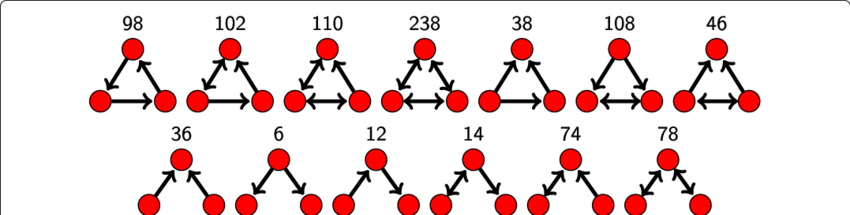

Reference:
[1] Märtens, M., Meier, J., Hillebrand, A. et al. Brain network clustering with information flow motifs. Appl Netw Sci 2, 25 (2017).DOI: 10.1007/s41109-017-0046-z

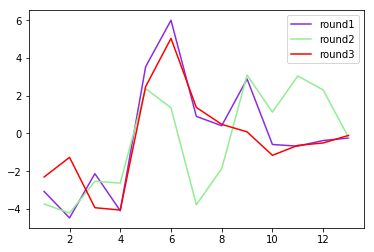

<Figure size 1152x1152 with 0 Axes>

In [10]:
zscore1=[-3.078,-4.478,-2.133,-4.096,3.533,6.000,0.903,0.409,2.888,-0.587,-0.673,-0.375,-0.243]
zscore2=[-3.743,-4.220,-2.535,-2.633,2.378,1.359,-3.775,-1.870,3.097,1.132,3.048,2.306,-0.212]
zscore3=[-2.307,-1.267,-3.937,-4.059,2.480,5.040,1.377,0.483,0.083,-1.160,-0.632,-0.505,-0.105]
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(1, 13, 13)
plt.plot(x, zscore1, color='blueviolet', label='round1')
plt.plot(x, zscore2, color='lightgreen', label='round2')
plt.plot(x, zscore3, color='r', label='round3')
plt.legend()
plt.figure(figsize=(16, 16))
plt.show()

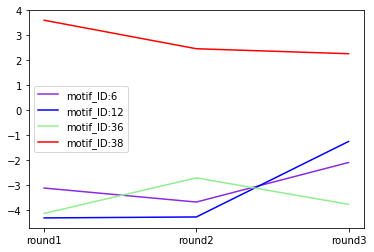

<Figure size 1152x1152 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
zscore6=[-3.133,-3.694,-2.108]
zscore12=[-4.331,-4.293,-1.264]
zscore36=[-4.151,-2.724,-3.786]
zscore38=[3.600,2.457,2.257]
x = ["round1","round2","round3"]
plt.plot(x, zscore6, color='blueviolet', label='motif_ID:6')
plt.plot(x, zscore12, color='b', label='motif_ID:12')
plt.plot(x, zscore36, color='lightgreen', label='motif_ID:36')
plt.plot(x, zscore38, color='r', label='motif_ID:38')
plt.legend()
plt.figure(figsize=(16, 16))
plt.show()

### Exercise 1.4 [10 marks]

#### 1.4.1
Use an algorithm of your choice (motivate your choice by discussing the pros and cons) to find the communities in the network from the last round. Draw the partitioned network and print the node memberships.

#### 1.4.2
Discuss your findings from 1.4.1, including any limitation of these results.

In this part, I will use two algorithms to find the communities. The result and the discussion will be presented below each algorithm.

[['s2237960', 's1753186', 's1760487', 's2257317', 's2254857', 's2259246'], ['s2177703', 's2237514', 's2023179'], ['s2259358', 's2153504', 's2151508', 's2257567'], ['s1814557', 's2160591', 's2251969', 's2254083', 's2154913', 's2184535', 's2259096', 's2168270', 's2234598', 's2254361', 's1984025', 's2256687', 's2228706', 's2251114', 's2140075', 's2169141', 's2186708', 's2207545', 's2181306', 's2251666', 's2196839', 's2259528', 's2198058', 's2229058', 's2182294', 's2260713', 's2176251', 's1810787', 's2163972', 's2185398', 's2187031'], ['s2122036', 's2175454', 's2178448'], ['s2198227', 's2168730'], ['s2041603', 's2045912']]


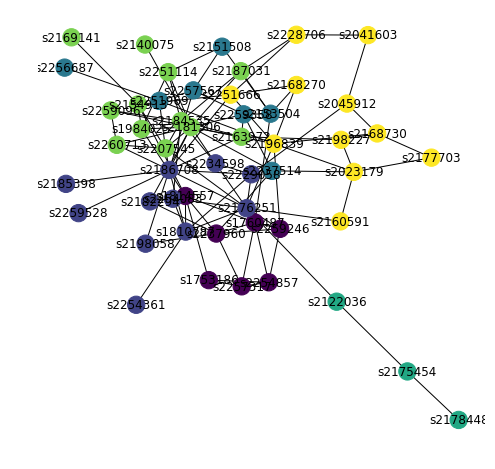

In [11]:
import networkx as nx
import pandas as pd

exposuredf3=pd.read_csv('round3_edgelist.csv')
G3 = nx.from_pandas_edgelist(exposuredf3, create_using=nx.DiGraph())
G33 = G3.to_undirected()

from networkx.algorithms import community

def label_propagation_community(G33):
    communities_generator = list(community.label_propagation_communities(G33))
    m = []
    for i in communities_generator:
        m.append(list(i))
    return m

g=label_propagation_community(G33)
print(g)

import community
import matplotlib.pyplot as plt



partition = community.best_partition(G33)  # compute communities

pos = nx.spring_layout(G33)  # compute graph layout
plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
plt.axis('off')
nx.draw(G33, pos, node_color=list(partition.values()),with_labels = True)
plt.show()

## PART 2 - Bitcoin Networks
For this part, you will use the bitcoin networks available on Learn under "coursework data". These networks represent transactions between users. The direction of the links represents the transaction flow, i.e., a link from i to j represent a transaction from i to j.

Data is provided for the three months between 09-Sep-2013 and 08-Dec-2013, during which there was a price bubble (from 07-Oct to 23-Nov).

### Exercise 2.1 [10 marks]

#### 1.1.1
For each weekly network, find the largest weakly and strongly connected components.

For each of them, compute the following network statistics:
- Number of nodes
- Number of links
- Density
- Clustering coefficient
- Average degrees (in-degree, out-degree, total degree)
- Average path length
- Diameter
- Degree distributions (in-degree, out-degree, total degree)
- Centrality distribution (choose one centrality measure, motivating your choice)


#### 1.1.2
Display these results using a pandas dataframe in which rows are the rounds and columns are the quantities.

#### 1.1.3
In light of these results, provide a brief comparison of the two networks.

#### 1.1.4 
What type of network (e.g., random, small world, etc.) do you think these are? Motivate your answer by using your results.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
0


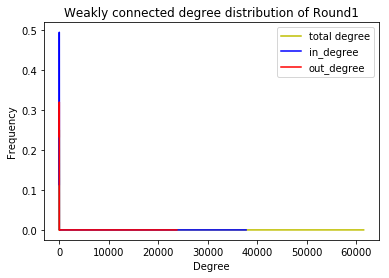

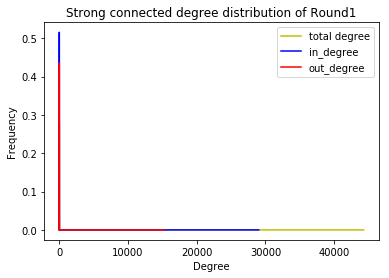

1


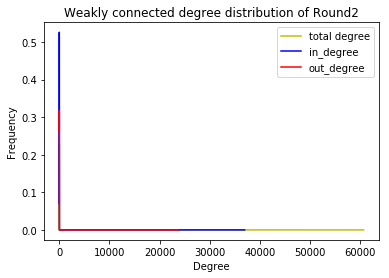

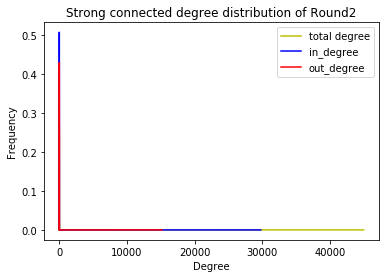

2


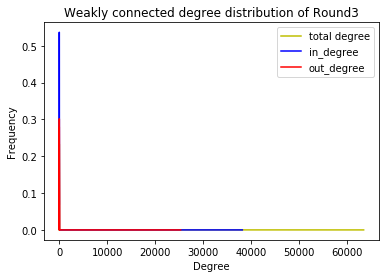

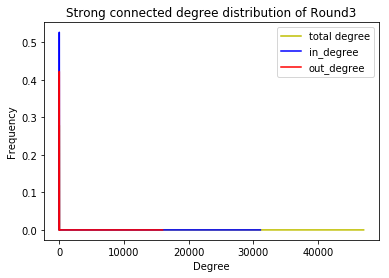

3


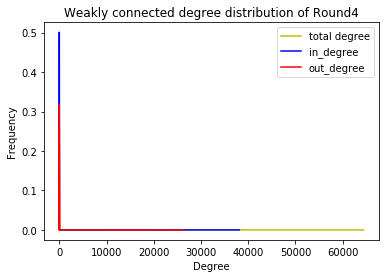

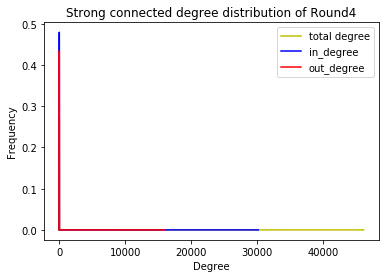

4


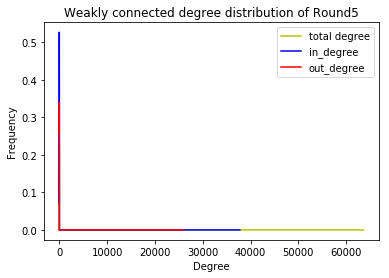

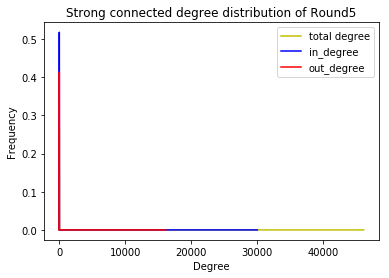

5


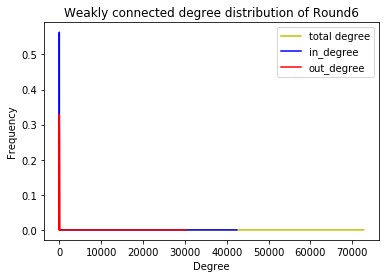

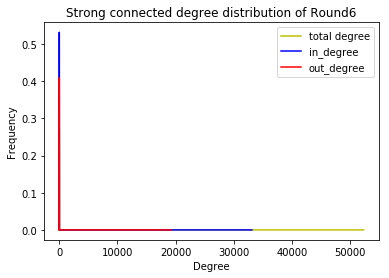

6


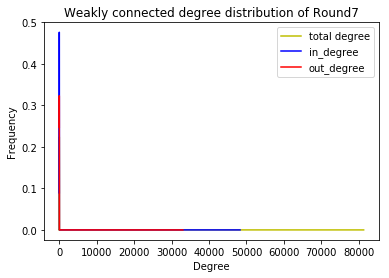

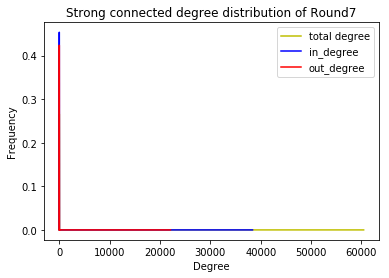

7


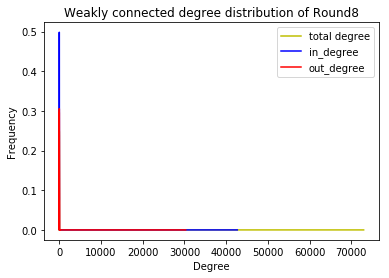

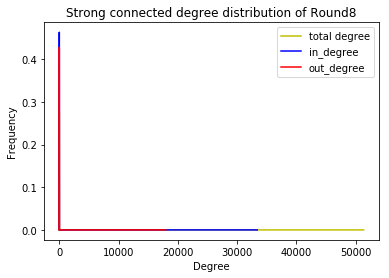

8


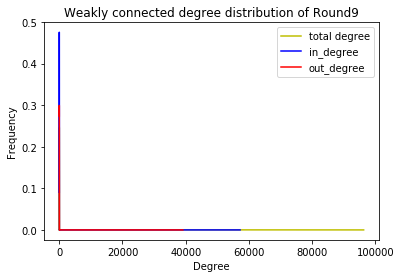

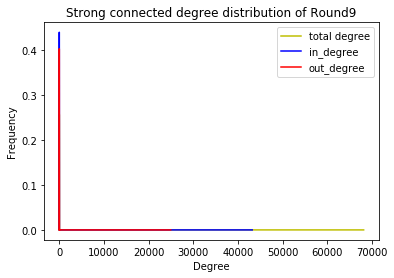

9


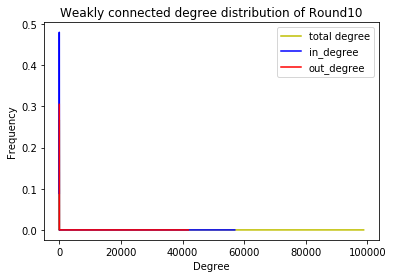

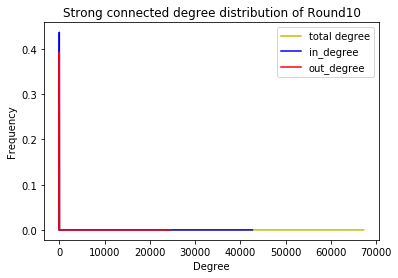

10


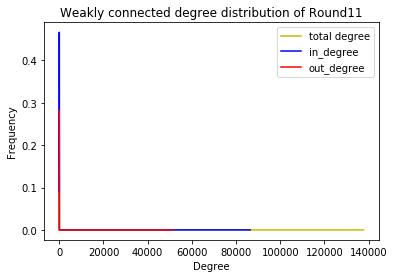

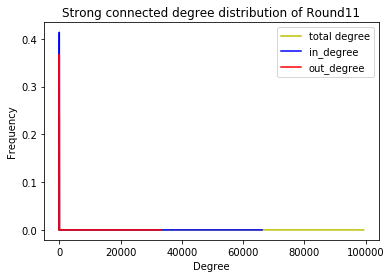

11


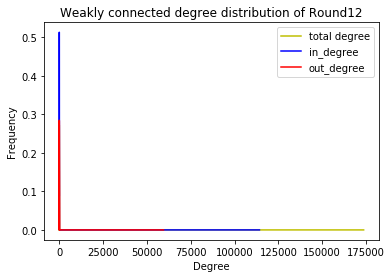

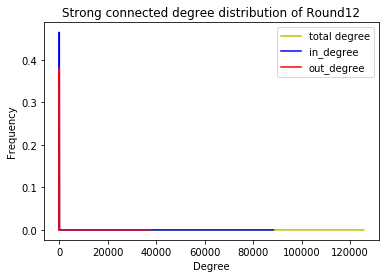

12


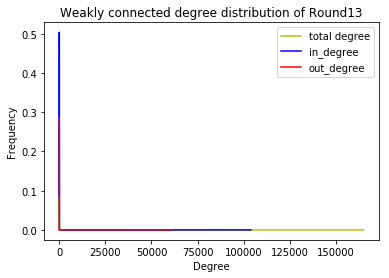

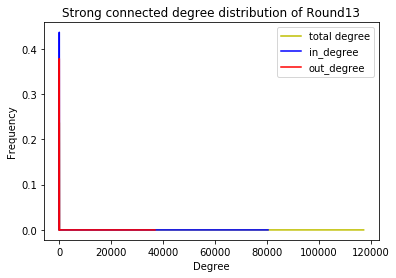

         Weak Number of nodes  Weak Number of links  Weak Density  \
Round1                 102971                227312      0.000021   
Round2                 104007                242400      0.000022   
Round3                 104933                246041      0.000022   
Round4                 112431                270152      0.000021   
Round5                 111155                263767      0.000021   
Round6                 130706                302436      0.000018   
Round7                 136606                330010      0.000018   
Round8                 131312                308159      0.000018   
Round9                 178399                418585      0.000013   
Round10                185999                447948      0.000013   
Round11                266270                626207      0.000009   
Round12                304379                697422      0.000008   
Round13                303356                701882      0.000008   

         Weak Clustering coeffici

In [4]:
import multiprocessing
import random

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def read_graph(subgraph_file=None):
    # write the graph out
    file_format = subgraph_file.split(".")[-1]
    if file_format == "graphml":
        return nx.read_graphml(subgraph_file)
    else:
        print("File format not found, returning empty graph.")
    return nx.MultiDiGraph()

def degree_histogram_directed(G, in_degree=False, out_degree=False):
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq=[0 for d in range(dmax)]
    for d in degseq:
        freq[d] += 1
    return freq

def single_source_average_path_length(G, node):
    return np.average(list(nx.single_source_shortest_path_length(G, node).values()))

def average_squared_degree(G):
    k2 = 0
    for node in G.node():
        k2 = k2 + G.degree(node)**2
    average_squared_degree = k2/G.number_of_nodes()
    return average_squared_degree

def estimated_average_path_length(G, N_sample=100):
    if G.is_directed():
        components = nx.strongly_connected_component_subgraphs(G)
    else:
        components = nx.connected_component_subgraphs(G)
    core = max(components, key=len)

    print(type(core))
    print(len(core))

    if core.number_of_nodes() <= N_sample:
        sampled_nodes = list(core.nodes)
    else:
        sampled_nodes = random.sample(list(core.nodes), N_sample)

    with multiprocessing.Pool() as pool:
        args = ((core, node) for node in sampled_nodes)
        node_apls = pool.starmap(single_source_average_path_length, args)

    return np.average(node_apls)



x = np.linspace(1, 13, 13)
print(x)
file_list = ["2013-09-09_to_2013-09-15.graphml",
             "2013-09-16_to_2013-09-22.graphml",
             "2013-09-23_to_2013-09-29.graphml",
             "2013-09-30_to_2013-10-06.graphml",
             "2013-10-07_to_2013-10-13.graphml",
             "2013-10-14_to_2013-10-20.graphml",
             "2013-10-21_to_2013-10-27.graphml",
             "2013-10-28_to_2013-11-03.graphml",
             "2013-11-04_to_2013-11-10.graphml",
             "2013-11-11_to_2013-11-17.graphml",
             "2013-11-18_to_2013-11-24.graphml",
             "2013-11-25_to_2013-12-01.graphml",
             "2013-12-02_to_2013-12-08.graphml"]
records = []
g_number_of_nodes = []
g_number_of_links = []
g_density = []
g_clustering_coefficient = []
g_average_degrees_in = []
g_average_degrees_out = []
g_average_degrees_total = []
# g_average_path_length = []
# g_diameter = []
g_degree_distribution = []
g_kappa = []

G_number_of_nodes = []
G_number_of_links = []
G_density = []
G_clustering_coefficient = []
G_average_degrees_in = []
G_average_degrees_out = []
G_average_degrees_total = []
# G_average_path_length = []
# G_diameter = []
G_degree_distribution = []
G_kappa = []

index_ls = []
for i in range(0, len(file_list)):
    print(i)
    original_G = nx.read_graphml(file_list[i])
    g = max(nx.weakly_connected_component_subgraphs(original_G), key=len)
    G = max(nx.strongly_connected_component_subgraphs(original_G), key=len)
    g_number_of_nodes.append(g.number_of_nodes())
    g_number_of_links.append(g.number_of_edges())
    g_density.append(nx.density(g))
    g_clustering_coefficient.append(nx.average_clustering(g.to_undirected()))
    g_in_degree = 0
    g_out_degree = 0
    g_total_degree = 0
    g_in_ls = g.in_degree
    g_out_ls = g.out_degree
    g_total_ls = g.degree
    for v in g.nodes:
        g_in_degree += g_in_ls[v]
        g_out_degree += g_out_ls[v]
        g_total_degree += g_total_ls[v]
    g_average_degrees_in.append(g_in_degree / g_number_of_nodes[i])
    g_average_degrees_out.append(g_out_degree / g_number_of_nodes[i])
    g_average_degrees_total.append(g_total_degree / g_number_of_nodes[i])
#     g_average_path_length.append(estimated_average_path_length(g, 1000))
#     g_diameter.append(nx.diameter(g.to_undirected()))
    g_degree_distribution.append(np.mean(nx.degree_histogram(g)))
    g_kappa.append(average_squared_degree(g)/average_total_degree(g)**2)


    G_number_of_nodes.append(G.number_of_nodes())
    G_number_of_links.append(G.number_of_edges())
    G_density.append(nx.density(G))
    G_clustering_coefficient.append(nx.average_clustering(G.to_undirected()))
    G_in_degree = 0
    G_out_degree = 0
    G_total_degree = 0
    G_in_ls = G.in_degree
    G_out_ls = G.out_degree
    G_total_ls = G.degree
    for v in G.nodes:
        G_in_degree += G_in_ls[v]
        G_out_degree += G_out_ls[v]
        G_total_degree += G_total_ls[v]
    G_average_degrees_in.append(G_in_degree / G_number_of_nodes[i])
    G_average_degrees_out.append(G_out_degree / G_number_of_nodes[i])
    G_average_degrees_total.append(G_total_degree / G_number_of_nodes[i])
#     G_average_path_length.append(estimated_average_path_length(G, 1000))
#     G_diameter.append(nx.diameter(G.to_undirected()))
    G_degree_distribution.append(np.mean(nx.degree_histogram(G)))
    G_kappa.append(average_squared_degree(G)/average_total_degree(G)**2)

    index_ls.append("Round" + str(i + 1))
    
    
    degree1 = nx.degree_histogram(g)
    in_degree_freq1 = degree_histogram_directed(g, in_degree=True)
    out_degree_freq1 = degree_histogram_directed(g, out_degree=True)
    x1=range(len(degree1))
    y1=[z/float(sum(degree1))for z in degree1]
    x2=range(len(in_degree_freq1))
    y2=[z/float(sum(in_degree_freq1))for z in in_degree_freq1]
    x3=range(len(out_degree_freq1))
    y3=[z/float(sum(out_degree_freq1))for z in out_degree_freq1]
    plt.plot(x1,y1,"y",label='total degree')
    plt.plot(x2,y2,"b",label='in_degree')
    plt.plot(x3,y3,"r",label='out_degree')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title('Weakly connected degree distribution of ' + index_ls[i])
    plt.legend()
    plt.show()
    
    degree2 = nx.degree_histogram(G)
    in_degree_freq2 = degree_histogram_directed(G, in_degree=True)
    out_degree_freq2 = degree_histogram_directed(G, out_degree=True)
    X1=range(len(degree2))
    Y1=[z/float(sum(degree2))for z in degree2]
    X2=range(len(in_degree_freq2))
    Y2=[z/float(sum(in_degree_freq2))for z in in_degree_freq2]
    X3=range(len(out_degree_freq2))
    Y3=[z/float(sum(out_degree_freq2))for z in out_degree_freq2]
    plt.plot(X1,Y1,"y",label='total degree')
    plt.plot(X2,Y2,"b",label='in_degree')
    plt.plot(X3,Y3,"r",label='out_degree')
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title('Strong connected degree distribution of ' + index_ls[i])
    plt.legend()
    plt.show()
    
#     eigenvec_centr = list(nx.eigenvector_centrality(original_G).values())
#     counts, bins, patches = plt.hist(eigenvec_centr, bins=20)
#     plt.xlabel("Centrality")
#     plt.ylabel("Absolute frequency")
#     plt.title("Centrality distribution of " + index_ls[i])
#     plt.show()
    
data = {"Weak Number of nodes": g_number_of_nodes, "Weak Number of links": g_number_of_links, "Weak Density": g_density,
         "Weak Clustering coefficient": g_clustering_coefficient, 
        "Weak Average degree(Total)": g_average_degrees_total,
        "Weak Average in-degree": g_average_degrees_in, "Weak Average out-degree": g_average_degrees_out,
#         "Weak Average path length": g_average_path_length,
#         "Weak Diameter": g_diameter,
        "Weak degree distribution":g_degree_distribution,
        "Strong Number of nodes": G_number_of_nodes, "Strong Number of links": G_number_of_links,
        "Strong Density": G_density,
         "Strong Clustering coefficient": G_clustering_coefficient,
        "Strong Average degree(Total)": G_average_degrees_total,
        "Strong Average in-degree": G_average_degrees_in, "Strong Average out-degree": G_average_degrees_out,
#         "Strong Average path length": G_average_path_length,
#         "Strong Diameter": G_diameter,
        "Strong degree distribution":G_degree_distribution
        }
df = pd.DataFrame(data, index=index_ls)
print(df)

In [7]:
data = {"Weak Number of nodes": g_number_of_nodes, "Weak Number of links": g_number_of_links, "Weak Density": g_density,
         "Weak Clustering coefficient": g_clustering_coefficient, 
        "Weak Average degree(Total)": g_average_degrees_total,
        "Weak Average in-degree": g_average_degrees_in, "Weak Average out-degree": g_average_degrees_out,
#         "Weak Average path length": g_average_path_length,
#         "Weak Diameter": g_diameter,
        "Weak degree distribution":g_degree_distribution,"Weak kappa":g_kappa,
        "Strong Number of nodes": G_number_of_nodes, "Strong Number of links": G_number_of_links,
        "Strong Density": G_density,
         "Strong Clustering coefficient": G_clustering_coefficient,
        "Strong Average degree(Total)": G_average_degrees_total,
        "Strong Average in-degree": G_average_degrees_in, "Strong Average out-degree": G_average_degrees_out,
#         "Strong Average path length": G_average_path_length,
#         "Strong Diameter": G_diameter,
        "Strong degree distribution":G_degree_distribution,"Strong kappa":G_kappa
        }
df = pd.DataFrame(data, index=index_ls)
df

,Weak Number of nodes,Weak Number of links,Weak Density,Weak Clustering coefficient,Weak Average degree(Total),Weak Average in-degree,Weak Average out-degree,Weak degree distribution,Weak kappa,Strong Number of nodes,Strong Number of links,Strong Density,Strong Clustering coefficient,Strong Average degree(Total),Strong Average in-degree,Strong Average out-degree,Strong degree distribution,Strong kappa
Round1,102971,227312,0.000021,0.175464,4.415068,2.207534,2.207534,1.674352,1892.359742,59574,148959,0.000042,0.245231,5.000806,2.500403,2.500403,1.345211,1320.455069
Round2,104007,242400,0.000022,0.179413,4.661225,2.330612,2.330612,1.713657,1639.071490,60774,153809,0.000042,0.240223,5.061671,2.530836,2.530836,1.351224,1302.988079
Round3,104933,246041,0.000022,0.185611,4.689488,2.344744,2.344744,1.651526,1760.488582,60619,153914,0.000042,0.254669,5.078078,2.539039,2.539039,1.288341,1420.872041
Round4,112431,270152,0.000021,0.169359,4.805650,2.402825,2.402825,1.744144,1609.862292,65944,166822,0.000038,0.224041,5.059505,2.529753,2.529753,1.428658,1266.602586
Round5,111155,263767,0.000021,0.177101,4.745931,2.372966,2.372966,1.746237,1627.561467,64295,163760,0.000040,0.236967,5.094020,2.547010,2.547010,1.392119,1283.004556
Round6,130706,302436,0.000018,0.166056,4.627729,2.313865,2.313865,1.797313,1899.475308,69933,176285,0.000036,0.240578,5.041540,2.520770,2.520770,1.335313,1547.566183
Round7,136606,330010,0.000018,0.181075,4.831559,2.415780,2.415780,1.680126,2085.042022,80556,214668,0.000033,0.244528,5.329659,2.664829,2.664829,1.332583,1603.113130
Round8,131312,308159,0.000018,0.167158,4.693539,2.346770,2.346770,1.800027,1852.623124,71727,185615,0.000036,0.230789,5.175596,2.587798,2.587798,1.396826,1376.777840
Round9,178399,418585,0.000013,0.158270,4.692683,2.346342,2.346342,1.852361,2374.882756,97739,259483,0.000027,0.225841,5.309713,2.654856,2.654856,1.434238,1688.410553
Round10,185999,447948,0.000013,0.152872,4.816671,2.408336,2.408336,1.882486,2276.884974,96291,257001,0.000028,0.218667,5.338007,2.669003,2.669003,1.431453,1653.034580


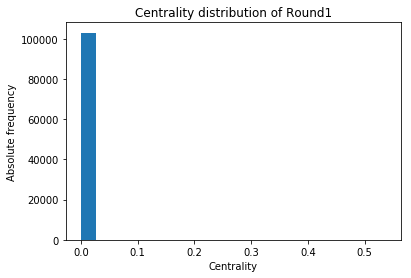

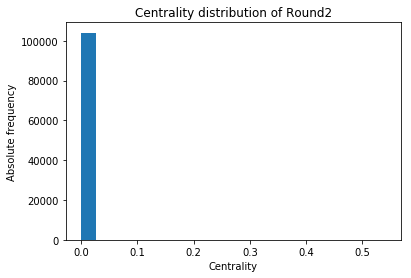

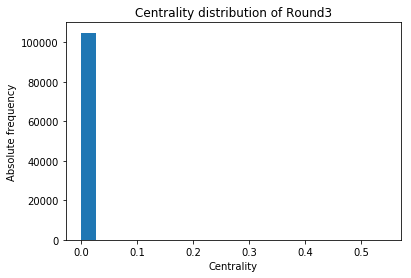

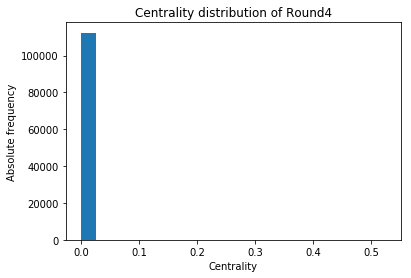

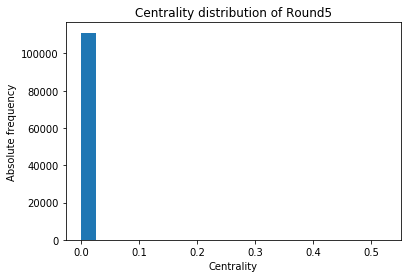

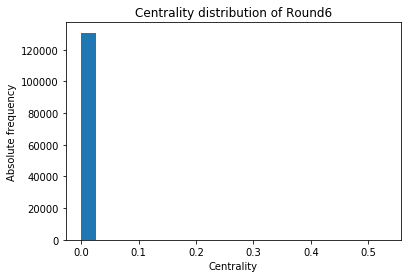

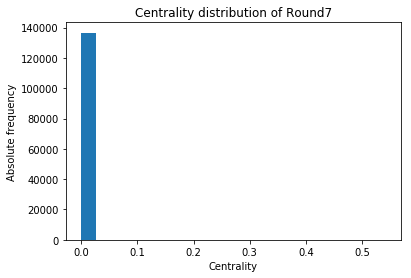

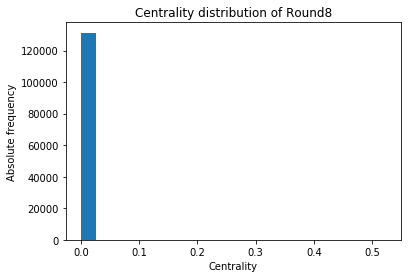

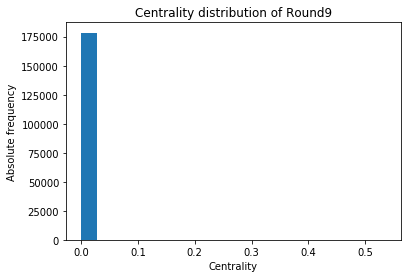

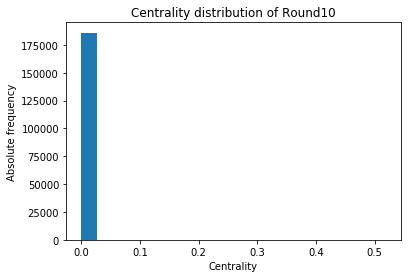

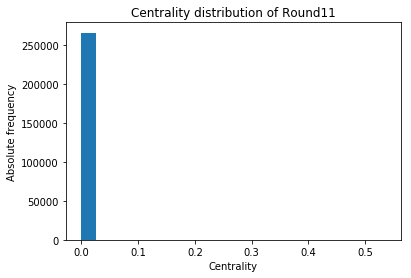

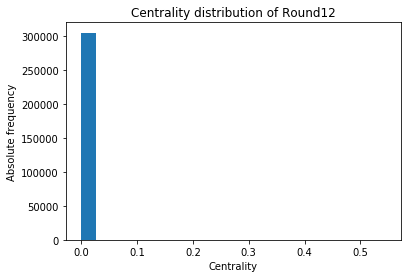

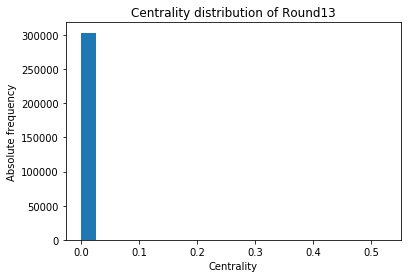

In [14]:
index_ls = []
for i in range(0, len(file_list)):
    original_G = nx.read_graphml(file_list[i])
    g = max(nx.weakly_connected_component_subgraphs(original_G), key=len)
    index_ls.append("Round" + str(i + 1))
    eigenvec_centr = list(nx.eigenvector_centrality(g,100000).values())
    counts, bins, patches = plt.hist(eigenvec_centr, bins=20)
    plt.xlabel("Centrality")
    plt.ylabel("Absolute frequency")
    plt.title("Centrality distribution of " + index_ls[i])
    plt.show()

### Exercise 2.2 [15 marks]
Plot the temporal evolution of the quantities you computed for Exercise 1.1 and discuss their evolution. Specifically, include discussion on:
- whether the way these quantities evolved is something you expected, and why.
- the temporal evoltuion of the computed quantities with respect to the bubble.
- similarities and differences of the temporal dynamics of the network quantities between the two components.

Note: make sure every plot is clear and it is easy to undersand which quantity is being plotted! When discussing the results, be accurate in specifying which quantity/plot you are referring to.

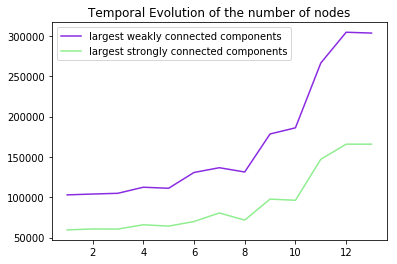

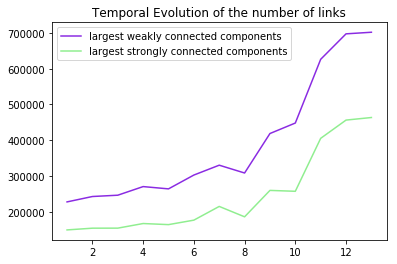

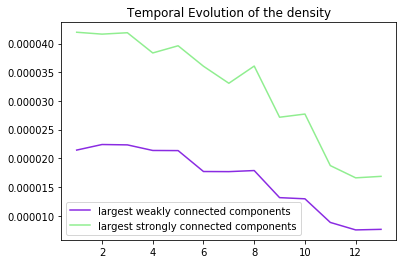

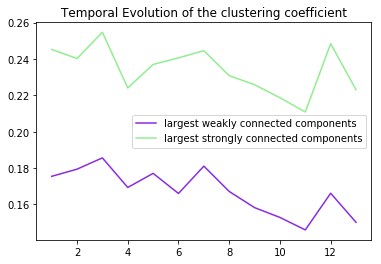

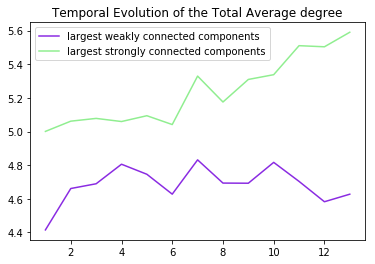

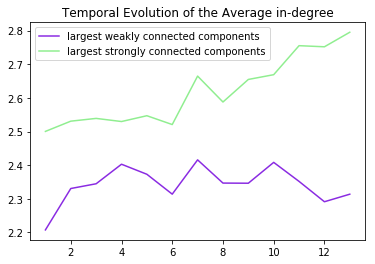

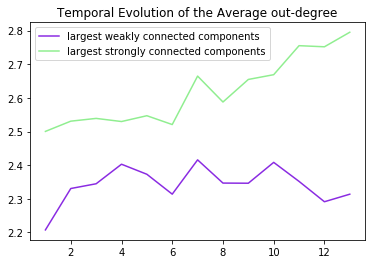

In [8]:
x = np.linspace(1, 13, 13)
plt.plot(x, g_number_of_nodes, color='blueviolet', label='largest weakly connected components')
plt.plot(x, G_number_of_nodes, color='lightgreen', label='largest strongly connected components')
plt.title("Temporal Evolution of the number of nodes")
plt.legend()
plt.show()

plt.plot(x, g_number_of_links, color='blueviolet', label='largest weakly connected components')
plt.plot(x, G_number_of_links, color='lightgreen', label='largest strongly connected components')
plt.title("Temporal Evolution of the number of links")
plt.legend()
plt.show()

plt.plot(x, g_density, color='blueviolet', label='largest weakly connected components')
plt.plot(x, G_density, color='lightgreen', label='largest strongly connected components')
plt.title("Temporal Evolution of the density")
plt.legend()
plt.show()

plt.plot(x, g_clustering_coefficient, color='blueviolet', label='largest weakly connected components')
plt.plot(x, G_clustering_coefficient, color='lightgreen', label='largest strongly connected components')
plt.title("Temporal Evolution of the clustering coefficient")
plt.legend()
plt.show()

plt.plot(x, g_average_degrees_total, color='blueviolet', label='largest weakly connected components')
plt.plot(x, G_average_degrees_total, color='lightgreen', label='largest strongly connected components')
plt.title("Temporal Evolution of the Total Average degree")
plt.legend()
plt.show()

plt.plot(x, g_average_degrees_in, color='blueviolet', label='largest weakly connected components')
plt.plot(x, G_average_degrees_in, color='lightgreen', label='largest strongly connected components')
plt.title("Temporal Evolution of the Average in-degree")
plt.legend()
plt.show()

plt.plot(x, g_average_degrees_out, color='blueviolet', label='largest weakly connected components')
plt.plot(x, G_average_degrees_out, color='lightgreen', label='largest strongly connected components')
plt.title("Temporal Evolution of the Average out-degree")
plt.legend()
plt.show()

# plt.plot(x, g_average_path_length, color='blueviolet', label='largest weakly connected components')
# plt.plot(x, G_average_path_length, color='lightgreen', label='largest strongly connected components')
# plt.title("Temporal Evolution of the Average path length")
# plt.legend()
# plt.show()

# plt.plot(x, g_diameter, color='blueviolet', label='largest weakly connected components')
# plt.plot(x, G_diameter, color='lightgreen', label='largest strongly connected components')
# plt.title("Temporal Evolution of the Diameter")
# plt.legend()
# plt.show()

### Exercise 2.3 [5 marks]

#### 2.3.1
Use an algorithm of your choice (motivate your choice by discussing the pros and cons) to find the communities in the last weekly network. Draw the corresponding super-networks of communities.

#### 2.3.2
Discuss your findings from 2.3.1, including any limitation of these results.

In [11]:
import networkx as nx
import pandas as pd

org_G = nx.read_graphml("2013-12-02_to_2013-12-08.graphml")
org_G1 = org_G.to_undirected()
from networkx.algorithms import community

def label_propagation_community(org_G1):
    communities_generator = list(community.label_propagation_communities(org_G1))
    m = []
    for i in communities_generator:
        m.append(list(i))
    return m

g=label_propagation_community(org_G1)
print(g)

import community
import matplotlib.pyplot as plt


pos = nx.spring_layout(org_G1)  # compute graph layout
plt.figure(figsize=(16, 16))  #
plt.axis('off')
nx.draw(org_G1, pos, node_color=list(partition.values()),with_labels = False)
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Exercise 2.4 [15 marks]
Find the 5 most important nodes in the network. Discuss and motivate your assumptions. Discuss your results and their implications.

In [19]:
import networkx as nx
from collections import Counter

org_G1 = nx.read_graphml("2013-09-09_to_2013-09-15.graphml")
org_G2 = nx.read_graphml("2013-09-16_to_2013-09-22.graphml")
org_G3 = nx.read_graphml("2013-09-23_to_2013-09-29.graphml")
org_G4 = nx.read_graphml("2013-09-30_to_2013-10-06.graphml")
org_G5 = nx.read_graphml("2013-10-07_to_2013-10-13.graphml")
org_G6 = nx.read_graphml("2013-10-14_to_2013-10-20.graphml")
org_G7 = nx.read_graphml("2013-10-21_to_2013-10-27.graphml")
org_G8 = nx.read_graphml("2013-10-28_to_2013-11-03.graphml")
org_G9 = nx.read_graphml("2013-11-04_to_2013-11-10.graphml")
org_G10 = nx.read_graphml("2013-11-11_to_2013-11-17.graphml")
org_G11 = nx.read_graphml("2013-11-18_to_2013-11-24.graphml")
org_G12 = nx.read_graphml("2013-11-25_to_2013-12-01.graphml")
org_G13 = nx.read_graphml("2013-12-02_to_2013-12-08.graphml")
ORG_G = [org_G1,org_G2,org_G3,org_G4,org_G5,org_G6,org_G7,org_G8,org_G9,org_G10,org_G11,org_G12,org_G13]

def get_order_N(_dict, N):
    result = Counter(_dict).most_common(N)
    d = {}
    for k,v in result:
        d[k]=v
    return d
degrees = {}
for g in ORG_G:
    degree = dict(g.degree)
    for k,v in get_order_N(degree,5).items():
        if k not in degrees.keys() or degrees[k] < v:
            degrees[k] = v
print(get_order_N(degrees, 5))

{'24778': 173686, '3183164': 4733, '4542806': 3696, '4632841': 2773, '5271613': 2469}
